In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
train = read_csv('data_inr.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df1=pd.read_csv("C:/Users/Admin/Documents/P-99/data_inr.csv",header=0, names=["Date","Rate"])

In [3]:
df1

,Date,Rate
0,12/31/1978,0.0
1,1/31/1979,1852.8
2,2/28/1979,2010.4
3,3/30/1979,1974.9
4,4/30/1979,1960.9
...,...,...
472,4/30/2018,87713.1
473,5/31/2018,88017.0
474,6/29/2018,86888.1
475,7/31/2018,85122.9


In [4]:
Train = df1.head(326)
Test = df1[326:]

In [5]:
Train

,Date,Rate
0,12/31/1978,0.0
1,1/31/1979,1852.8
2,2/28/1979,2010.4
3,3/30/1979,1974.9
4,4/30/1979,1960.9
...,...,...
321,9/30/2005,20011.1
322,10/31/2005,21049.6
323,11/30/2005,21769.3
324,12/30/2005,23298.0


In [6]:
Test

,Date,Rate
326,2/28/2006,24565.6
327,3/31/2006,24750.2
328,4/28/2006,27413.1
329,5/31/2006,30618.5
330,6/30/2006,27435.6
...,...,...
472,4/30/2018,87713.1
473,5/31/2018,88017.0
474,6/29/2018,86888.1
475,7/31/2018,85122.9


In [7]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [8]:
df1['Date'] = pd.to_datetime(df1['Date'],errors='coerce')

In [9]:
df1["month"] = df1.Date.dt.strftime("%b")
df1["year"] = df1.Date.dt.strftime("%Y")

In [10]:
df1

,Date,Rate,month,year
0,1978-12-31,0.0,Dec,1978
1,1979-01-31,1852.8,Jan,1979
2,1979-02-28,2010.4,Feb,1979
3,1979-03-30,1974.9,Mar,1979
4,1979-04-30,1960.9,Apr,1979
...,...,...,...,...
472,2018-04-30,87713.1,Apr,2018
473,2018-05-31,88017.0,May,2018
474,2018-06-29,86888.1,Jun,2018
475,2018-07-31,85122.9,Jul,2018


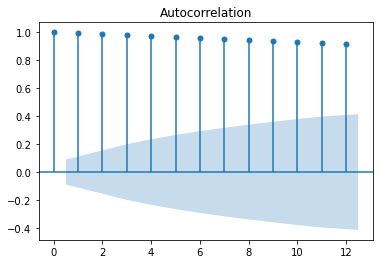

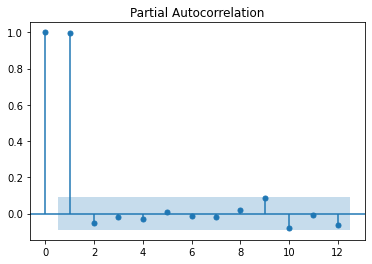

In [11]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df1.Rate,lags=12)
tsa_plots.plot_pacf(df1.Rate,lags=12)
plt.show()


# SIMPLE EXPONENTIAL METHOD

In [12]:
ses_model = SimpleExpSmoothing(Train['Rate']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Rate) 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


61.10138286416255

# HOLT METHOD

In [13]:
# Holt method 
hw_model = Holt(Train["Rate"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Rate)

<ipython-input-13-3e6f3b02aa18>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Rate"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


26.704064990599505

# Holts winter exponential smoothing with additive seasonality and additive trend

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [15]:
hwe_model_add_add = ExponentialSmoothing(Train["Rate"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Rate) 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


21.314172606142844

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [16]:
#Forecasting for next 10 time periods
hw_model.forecast(30)

326    24955.468855
327    25707.737530
328    26460.006204
329    27212.274879
330    27964.543553
331    28716.812228
332    29469.080902
333    30221.349577
334    30973.618251
335    31725.886926
336    32478.155600
337    33230.424275
338    33982.692949
339    34734.961624
340    35487.230298
341    36239.498973
342    36991.767647
343    37744.036322
344    38496.304996
345    39248.573671
346    40000.842345
347    40753.111020
348    41505.379694
349    42257.648369
350    43009.917043
351    43762.185718
352    44514.454392
353    45266.723067
354    46018.991741
355    46771.260416
dtype: float64

# ARIMA Hyperparameters

In [17]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Grid search for p,d,q values

In [18]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# Combine train and test data and build final model

In [19]:
# fit model
df = read_csv("C:/Users/Admin/Documents/P-99/data_inr.csv", header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [20]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


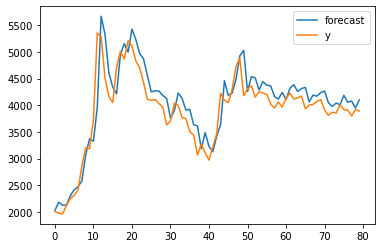

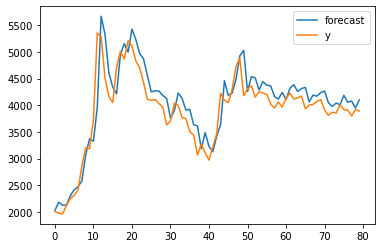

In [21]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)